# Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set
from scipy import stats
stats.chisqprob = lambda chisq, df:stats.chi2.sf(chisq,df)

# Load data

In [40]:
file_path = r'C:\Users\ajay4\OneDrive\Documents\Resume\Data science course\Data\Bank_data.csv'
raw_data = pd.read_csv(file_path)
raw_data.head(10)

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
5,5,0.899,0.0,0.0,1.0,0.0,126.0,no
6,6,4.962,0.0,0.0,0.0,0.0,84.0,no
7,7,4.858,0.0,1.0,0.0,0.0,17.0,no
8,8,4.962,0.0,0.0,0.0,0.0,704.0,yes
9,9,4.865,0.0,0.0,0.0,0.0,185.0,no


In [42]:
data = raw_data.copy() 
data = data.drop(['Unnamed: 0'],axis =1)
data['y'] = data['y'].map({'yes':1,'no':0})
data.head(10)

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
5,0.899,0.0,0.0,1.0,0.0,126.0,0
6,4.962,0.0,0.0,0.0,0.0,84.0,0
7,4.858,0.0,1.0,0.0,0.0,17.0,0
8,4.962,0.0,0.0,0.0,0.0,704.0,1
9,4.865,0.0,0.0,0.0,0.0,185.0,0


# Declare variables

In [45]:
x1 = data['duration']
y = data['y']

# Summary

In [48]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                  0.2121
Time:                        19:21:41   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

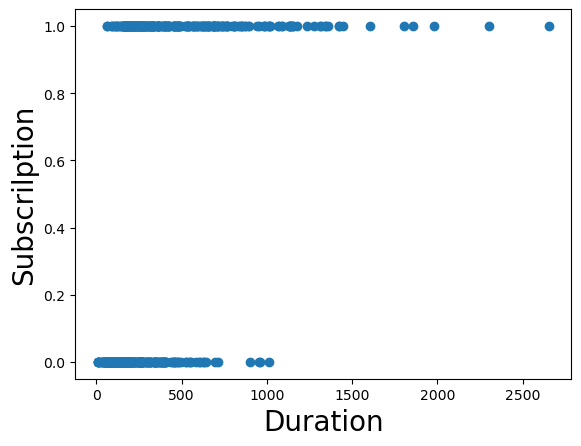

In [49]:
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Subscrilption',fontsize=20)
plt.show()

# Odds of duration

In [61]:
np.exp(0.0051)

1.005113027136717